# Fruit Detection

In [1]:
import numpy as np
import tensorflow as tf
import keras
import time

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from tensorflow.image import rgb_to_grayscale
from keras.optimizers import SGD

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [3]:
indices_train, indices_test = [], []

# Wir untersuchen, ob es sich bei einem Eintrag der Trainings-Labels um eines der Früchte handelt.
# Falls ja, fügen wir dessen Index einem zuvor initialisiertem Array hinzu.
for i in range(len(y_train)):
    if y_train[i] == 0 or y_train[i] == 53 or y_train[i] == 57:
        indices_train.append(i)

# Selbiges führen wir für alle Test-Labels durch.
for i in range(len(y_test)):
    if y_test[i] == 0 or y_test[i] == 53 or y_test[i] == 57:
        indices_test.append(i)

# Wir reduzieren unsere Trainings- und Test-Labels auf alle die der Früchte.
y_train = np.array(y_train[indices_train])
y_test = np.array(y_test[indices_test])

# Wir reduzieren unsere Trainings- und Testdaten auf alle die der Früchte.
x_train = x_train[np.ravel(indices_train)]
x_test = x_test[np.ravel(indices_test)]

# Für die Konvertierung unserer Label-Vektoren in Binäre-Klassenmatrizen, ändern wir alle ursprünglichen
# Trainings- und Test-Labels in die Werte 0-2. Man beachte: range(start, ende) inkludiert ende nicht!
for i in range(len(y_train)):
    if y_train[i] == 0:
        np.put(y_train, i, 0)
    elif y_train[i] == 53:
        np.put(y_train, i, 1)
    elif y_train[i] == 57:
        np.put(y_train, i, 2)

for i in range(len(y_test)):
    if y_test[i] == 0:
        np.put(y_test, i, 0)
    elif y_test[i] == 53:
        np.put(y_test, i, 1)
    elif y_test[i] == 57:
        np.put(y_test, i, 2)

class_names = ["Apfel", "Orange", "Birne"]



In [4]:
# Convert to grayscale
x_train = tf.Session().run(rgb_to_grayscale(
    x_train,
    name=None
))
x_test = tf.Session().run(rgb_to_grayscale(
    x_test,
    name=None
))

# Drop last dimension
x_train = x_train[:,:,:,0]
x_test = x_test[:,:,:,0]

print(x_train[0])


[[250 248 247 ... 250 250 249]
 [250 247 245 ... 250 251 250]
 [250 247 245 ... 248 248 248]
 ...
 [213 207 209 ... 178 194 230]
 [221 219 218 ... 187 202 232]
 [232 232 231 ... 210 217 230]]


In [5]:
x_train = x_train / 255.0

x_test = x_test / 255.0

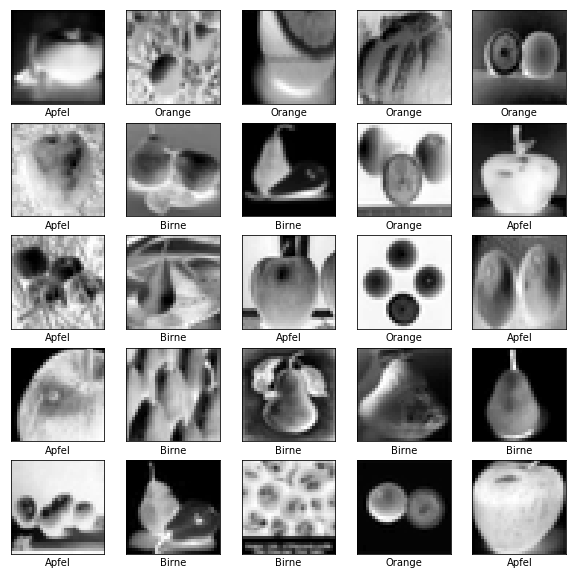

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.asscalar(y_train[i])])

In [13]:

model = Sequential([
    Flatten(input_shape=(32, 32)),
    Dense(1024, activation=tf.nn.relu),
    Dense(3, activation=tf.nn.softmax) 

])


In [15]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
tensorboardCb = keras.callbacks.TensorBoard(log_dir="logs/{}".format(time()))

TypeError: 'module' object is not callable

In [19]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Train on 1500 samples, validate on 300 samples
Epoch 1/25
1500/1500 [==============================] - 0s 286us/step - loss: 0.6227 - acc: 0.7393 - val_loss: 1.1041 - val_acc: 0.5833
Epoch 2/25
1500/1500 [==============================] - 0s 242us/step - loss: 0.6040 - acc: 0.7393 - val_loss: 1.1308 - val_acc: 0.5867
Epoch 3/25
1500/1500 [==============================] - 0s 267us/step - loss: 0.6275 - acc: 0.7420 - val_loss: 1.0820 - val_acc: 0.6100
Epoch 4/25
1500/1500 [==============================] - 0s 286us/step - loss: 0.6001 - acc: 0.7453 - val_loss: 1.0870 - val_acc: 0.5567
Epoch 5/25
1500/1500 [==============================] - 0s 259us/step - loss: 0.5715 - acc: 0.7587 - val_loss: 1.1154 - val_acc: 0.5800
Epoch 6/25
1500/1500 [==============================] - 0s 249us/step - loss: 0.5988 - acc: 0.7520 - val_loss: 1.1323 - val_acc: 0.5667
Epoch 7/25
1500/1500 [==============================] - 0s 250us/step - loss: 0.6186 - acc: 0.7353 - val_loss: 1.0876 - val_acc: 0.5867
E

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

300/300 [==============================] - 0s 134us/step
Test accuracy: 0.5733333325386047


In [21]:
predictions = model.predict(x_test)

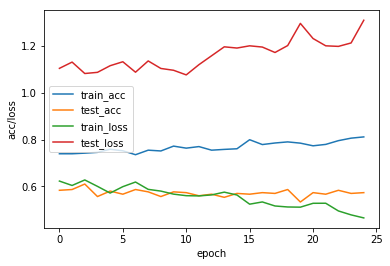

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('acc/loss')
plt.xlabel('epoch')
plt.legend(['train_acc', 'test_acc', 'train_loss', 'test_loss'], loc='best')
plt.show()

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.asscalar(predicted_label)],
                                100*np.max(predictions_array),
                                class_names[np.asscalar(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[np.asscalar(predicted_label)].set_color('red')
  thisplot[np.asscalar(true_label)].set_color('blue')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

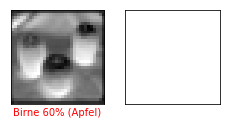

In [24]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)